In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
# Load the dataset
beninData = pd.read_csv("../data/benin-malanville.csv")

In [3]:
# Get basic information
beninData.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [4]:
beninData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [5]:
beninData.shape

(525600, 19)

summary statistics

In [6]:
#summary statistics
beninData.describe()

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.200000      28.800000       1.000000   
50%         4.300000      28.000000      55.100000       1.900000   
75%       447.900000      32.300000      80.100000       3.100000   
max      1342.300000      43.800000     100.000000      19.500000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        2.809195       0.473390     153.435172       8.582407   
std         2.029120       0.273395     102.332842       6.385864   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.400000      59.000000       3.700000   
50%         2.600000       0.500000     181.000000       8.600000   
75%         4.100000       0.600000     235.100000      12.300000   
max        26.600000       4.200000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      994.197199       0.000923       0.001905      35.246026   
std         2.474993       0.030363       0.037115      14.807258   
min       985.000000       0.000000       0.000000       9.000000   
25%       993.000000       0.000000       0.000000      24.200000   
50%       994.000000       0.000000       0.000000      30.000000   
75%       996.000000       0.000000       0.000000      46.900000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.471736       NaN  
std        12.348743       NaN  
min         8.100000       NaN  
25%        23.600000       NaN  
50%        28.900000       NaN  
75%        41.500000       NaN  
max        72.500000       NaN

Checking for negative values in GHI, DNI, DHI

In [7]:
#Checking for negative values in GHI, DNI, DHI
print((beninData[['GHI', 'DNI', 'DHI']] < 0).sum())

GHI    258847
DNI    275987
DHI    259182
dtype: int64


In [8]:
beninData.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [9]:
beninData["Comments"].unique()

array([nan])

Looking for missing values

In [10]:
#Looking for missing values
beninData.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [11]:
beninData = beninData.drop(["Comments"], axis=1)

In [12]:
beninData.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2  
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2  
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2  
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3  
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3

In [13]:
beninData.isnull().sum()

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64

checking for outliers

In [27]:
#using Z_scores method
def outliers(c):
  z_scores = (beninData[c] - beninData[c].mean()) / beninData[c].std()
  outlier = beninData[np.abs(z_scores) > 3]
  print(c," outliers\n",outlier[c], "\n\n")

In [28]:
outliers("ModA")
outliers("ModB")
outliers("WS")
outliers("WSgust")

ModA  outliers
 674       1281.5
676       1267.3
850       1218.0
5019      1271.0
5024      1305.6
8021      1220.0
12245     1320.5
12246     1342.3
12270     1312.0
12271     1321.5
12272     1306.2
12303     1236.9
12337     1274.9
20918     1292.0
20921     1313.8
20922     1324.3
29567     1270.0
43972     1217.8
52630     1228.5
52637     1236.8
54026     1219.3
54027     1248.4
54040     1233.8
54080     1234.8
186528    1266.1
360713    1224.0
360714    1281.3
Name: ModA, dtype: float64 


ModB  outliers
 671       1210.3
674       1281.5
676       1267.3
850       1217.0
5019      1271.0
           ...  
396684    1195.0
493263    1189.0
493264    1180.0
514921    1194.0
522075    1179.0
Name: ModB, Length: 63, dtype: float64 


WS  outliers
 2958      7.9
10079     8.2
10080     7.6
10081     7.5
10082     8.1
         ... 
525105    7.0
525107    7.0
525119    7.4
525141    7.1
525151    7.3
Name: WS, Length: 3109, dtype: float64 


WSgust  outliers
 2958       9.4
2959   

visualising outliers using scatter plot

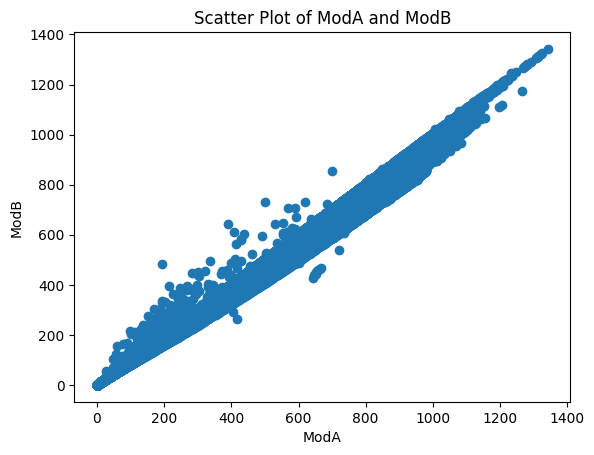

In [14]:
#scatter plot for ModA and ModB
plt.scatter(beninData['ModA'], beninData['ModB'])
plt.xlabel('ModA')
plt.ylabel('ModB')
plt.title('Scatter Plot of ModA and ModB')
plt.show()

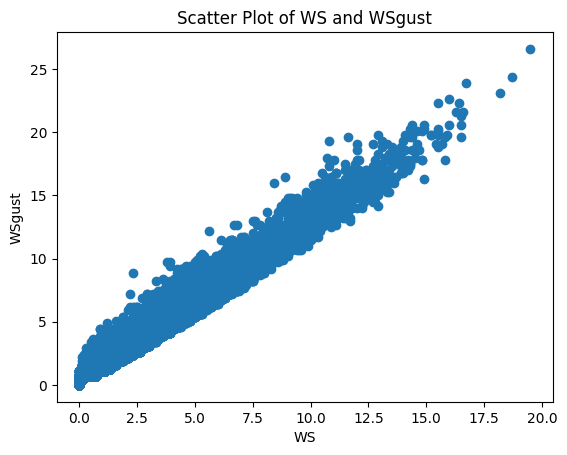

In [15]:
#scatter plot for WS and WSgust
plt.scatter(beninData['WS'], beninData['WSgust'])
plt.xlabel('WS')
plt.ylabel('WSgust')
plt.title('Scatter Plot of WS and WSgust')
plt.show()

Time Series Analysis

In [36]:
beninData["Timestamp"] = pd.to_datetime(beninData["Timestamp"])
beninData.sort_values('Timestamp', inplace=True)
def timeSeries(c):
  plt.plot(beninData['Timestamp'], beninData[c])
  plt.xlabel('Timestamp')
  plt.ylabel(c)
  plt.title(f'Time series for {c}')
  plt.show()

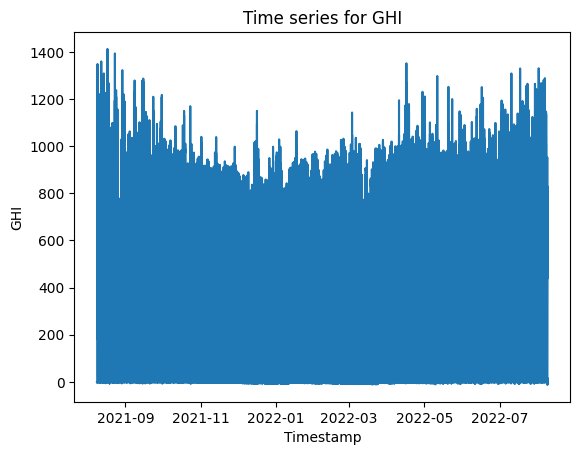

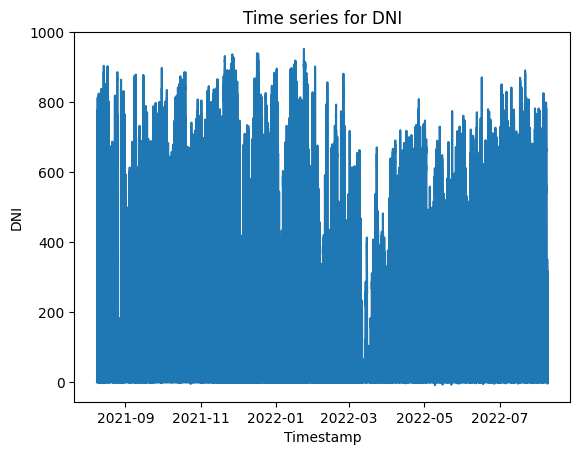

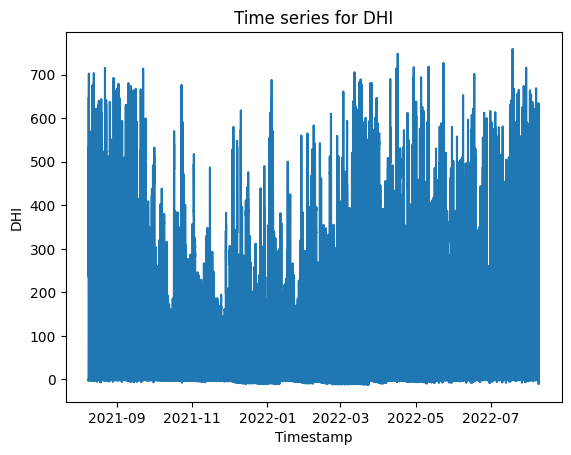

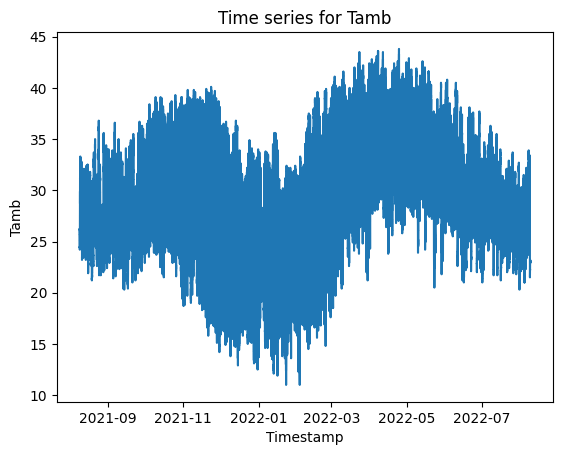

In [37]:
timeSeries("GHI")
timeSeries("DNI")
timeSeries("DHI")
timeSeries("Tamb")

Evaluate the impact of cleaning

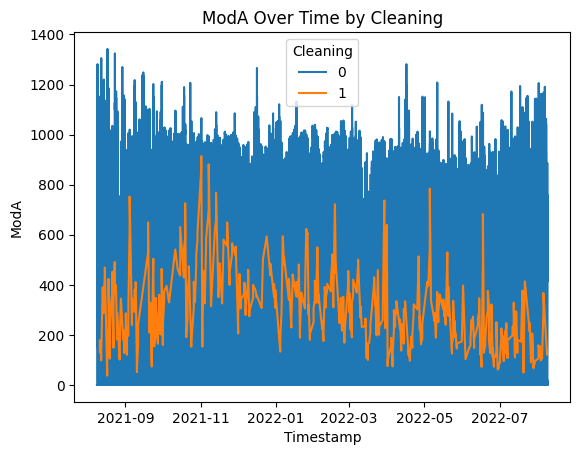

In [38]:
sns.lineplot(x='Timestamp', y='ModA', hue='Cleaning', data=beninData)
plt.title('ModA Over Time by Cleaning')
plt.show()

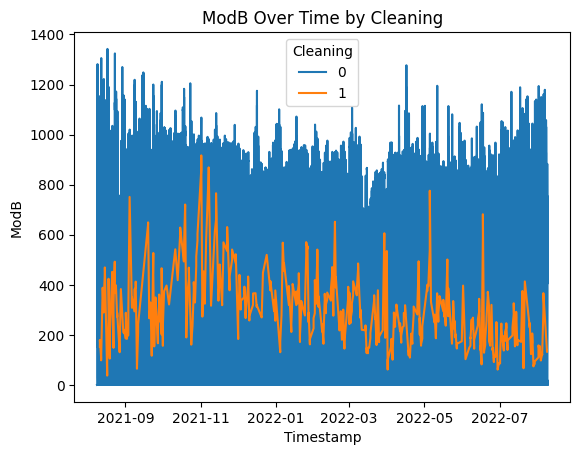

In [40]:
sns.lineplot(x='Timestamp', y='ModB', hue='Cleaning', data=beninData)
plt.title('ModB Over Time by Cleaning')
plt.show()

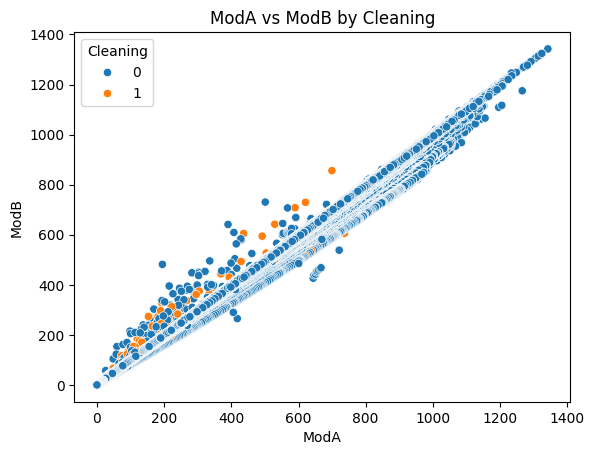

In [39]:
sns.scatterplot(x='ModA', y='ModB', hue='Cleaning', data=beninData)
plt.title('ModA vs ModB by Cleaning')
plt.show()

Correlation Analysis

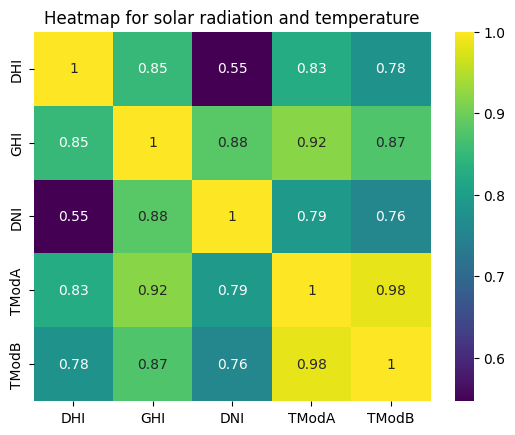

In [42]:
correlation_matrix = beninData[["DHI","GHI","DNI","TModA","TModB"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Heatmap for solar radiation and temperature')
plt.show()

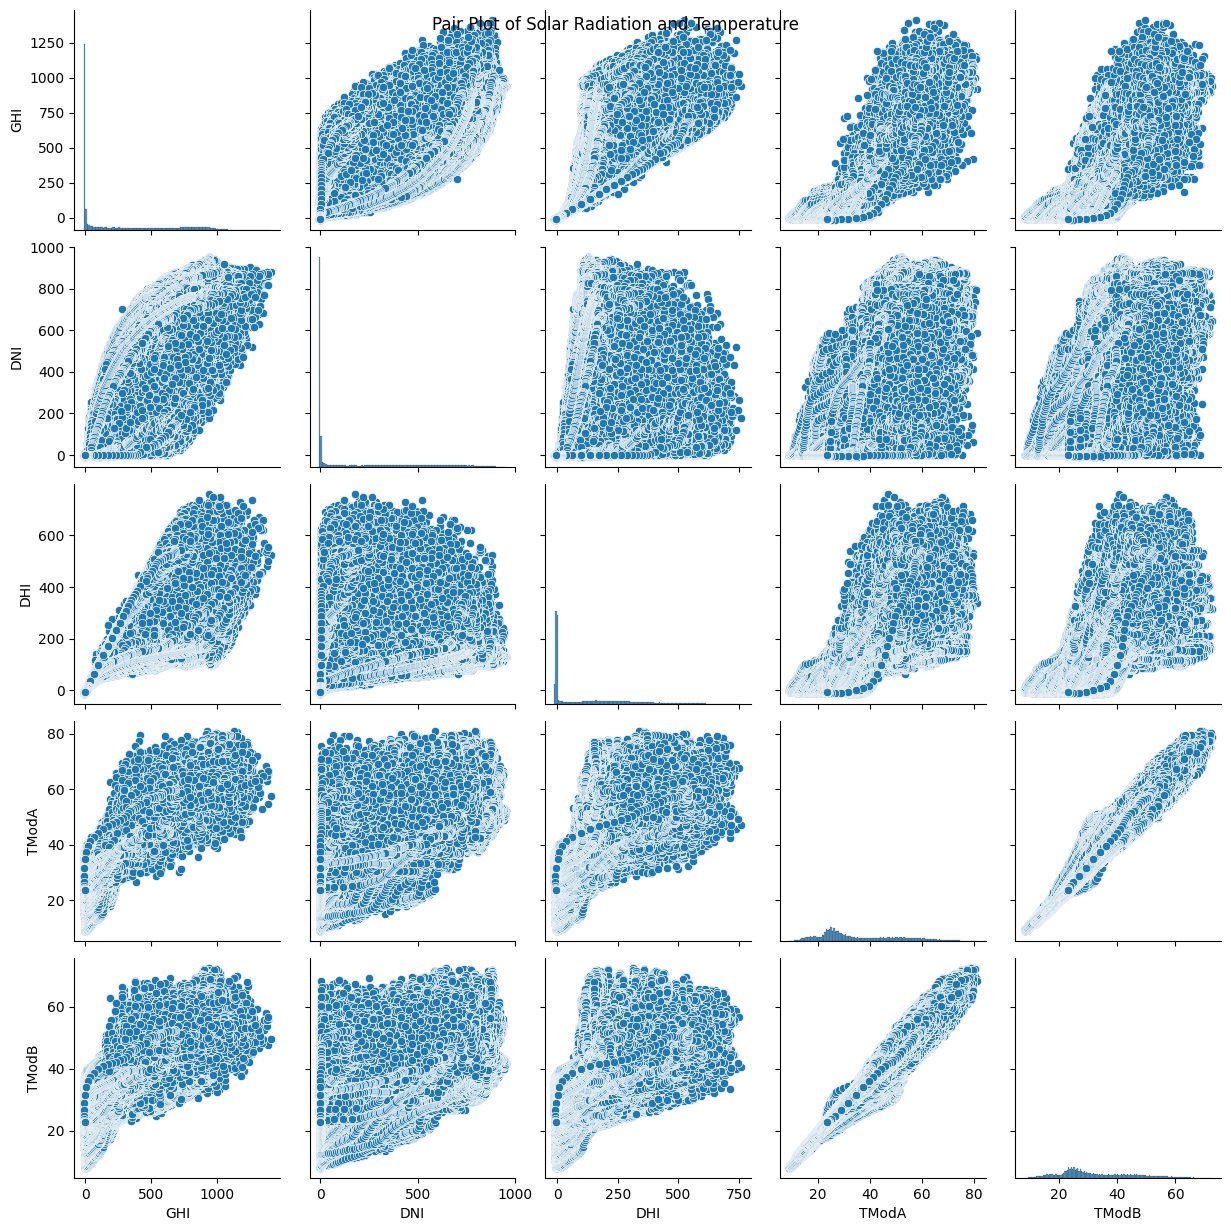

In [46]:
sns.pairplot(beninData[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']])
plt.suptitle('Pair Plot of Solar Radiation and Temperature')
plt.show()

 Investigate the relationship between wind conditions and solar irradiance using scatter matrices.

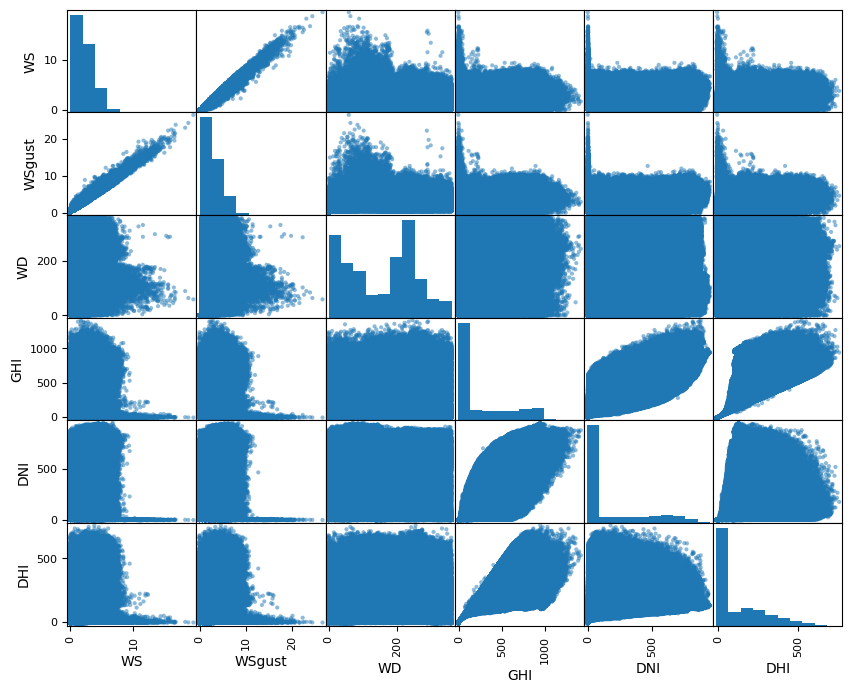

In [47]:
from pandas.plotting import scatter_matrix
scatter_matrix(beninData[['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI']], figsize=(10, 8))
plt.show()

Wind Analysis Using Polar plots

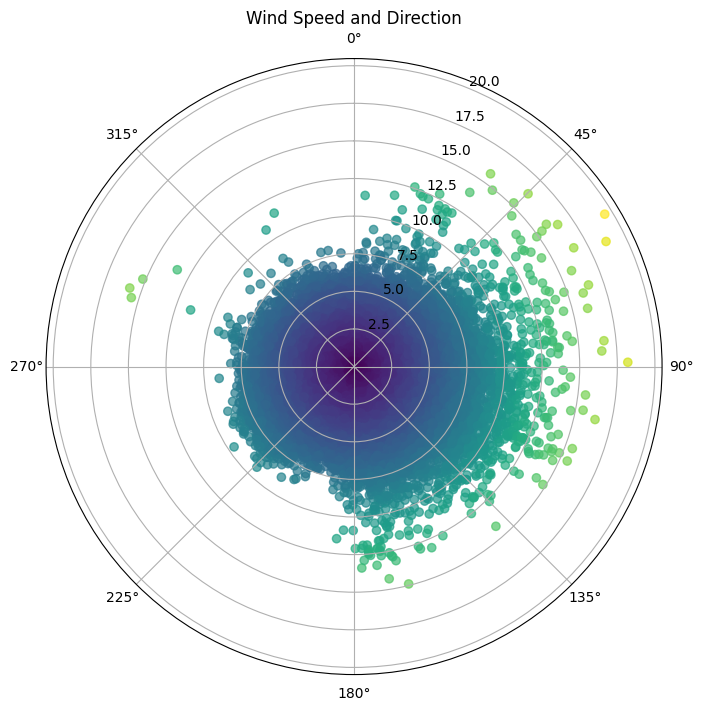

In [55]:
# Convert wind direction to radians
beninData['WD_rad'] = beninData['WD'] * np.pi / 180

norm = plt.Normalize(beninData['WS'].min(), beninData['WS'].max())

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.scatter(beninData['WD_rad'], beninData['WS'], c=beninData['WS'], cmap="viridis", norm=norm, alpha=0.7)
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
plt.title('Wind Speed and Direction')
# plt.colorbar(label='Wind Speed (m/s)')
plt.show()

Temperature Analysis using Heatmap and Scatter Plots

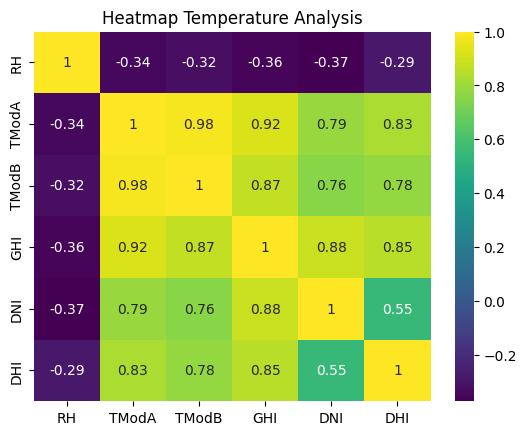

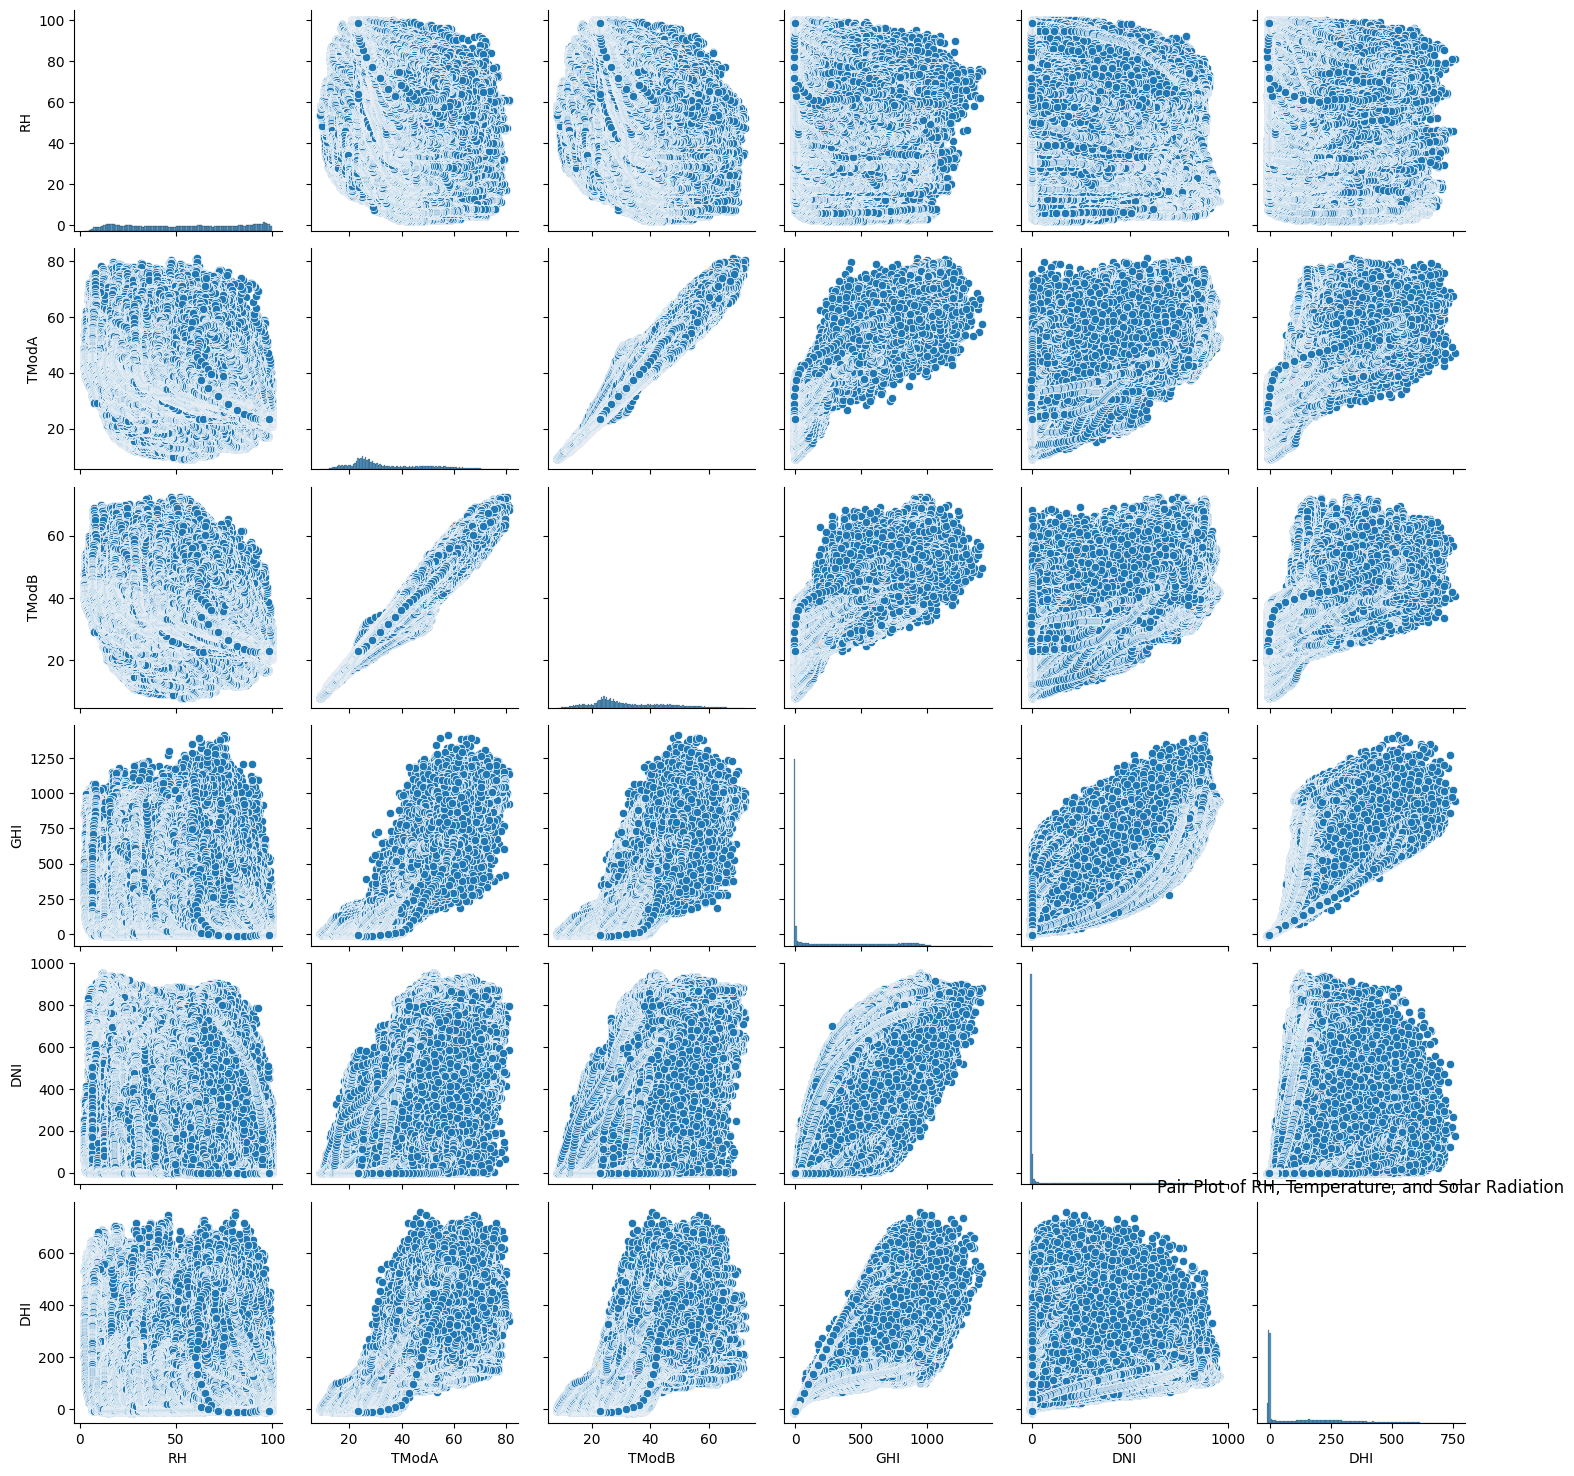

In [57]:
correlation_matrix = beninData[['RH', 'TModA', 'TModB', 'GHI', 'DNI', 'DHI']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Heatmap Temperature Analysis')
plt.show()

sns.pairplot(beninData[['RH', 'TModA', 'TModB', 'GHI', 'DNI', 'DHI']])
plt.suptitle('Pair Plot of RH, Temperature, and Solar Radiation')
plt.show()

Histograms

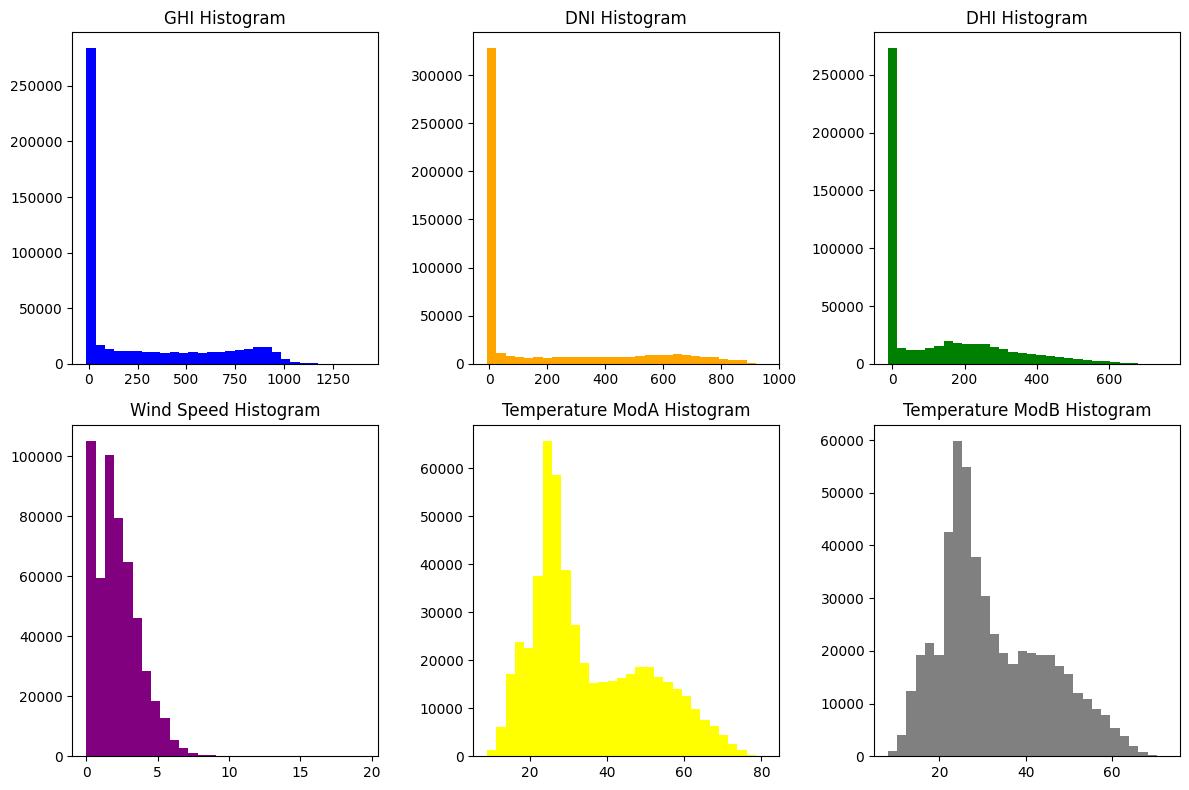

In [58]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.hist(beninData['GHI'], bins=30, color='blue')
plt.title('GHI Histogram')

plt.subplot(2, 3, 2)
plt.hist(beninData['DNI'], bins=30, color='orange')
plt.title('DNI Histogram')

plt.subplot(2, 3, 3)
plt.hist(beninData['DHI'], bins=30, color='green')
plt.title('DHI Histogram')

plt.subplot(2, 3, 4)
plt.hist(beninData['WS'], bins=30, color='purple')
plt.title('Wind Speed Histogram')

plt.subplot(2, 3, 5)
plt.hist(beninData['TModA'], bins=30, color='yellow')
plt.title('Temperature ModA Histogram')

plt.subplot(2, 3, 6)
plt.hist(beninData['TModB'], bins=30, color='gray')
plt.title('Temperature ModB Histogram')

plt.tight_layout()
plt.show()

Z-Score Analysis

In [60]:
columns = ["GHI", "DNI", "DHI", "WS", "TModA", "TModB","ModA" , "ModB"]
z_scores = (beninData[columns] - beninData[columns].mean()) / beninData[columns].std()

print(z_scores)


             GHI       DNI       DHI        WS     TModA     TModB      ModA  \
0      -0.730101 -0.639590 -0.733872 -1.322830 -0.604165 -0.507885 -0.723748   
1      -0.729799 -0.639590 -0.733872 -1.322830 -0.604165 -0.507885 -0.723748   
2      -0.729799 -0.639590 -0.733872 -1.135735 -0.597411 -0.507885 -0.723748   
3      -0.729799 -0.639208 -0.733242 -1.198100 -0.597411 -0.499787 -0.723748   
4      -0.729497 -0.639208 -0.733242 -1.260465 -0.597411 -0.499787 -0.723748   
...          ...       ...       ...       ...       ...       ...       ...   
525595 -0.743087 -0.639208 -0.764120 -1.135735 -0.793261 -0.775118 -0.723748   
525596 -0.743087 -0.639208 -0.763489 -1.198100 -0.793261 -0.775118 -0.723748   
525597 -0.743087 -0.639208 -0.763489 -0.948641 -0.793261 -0.775118 -0.723748   
525598 -0.743087 -0.639208 -0.763489 -0.761546 -0.793261 -0.775118 -0.723748   
525599 -0.743087 -0.639208 -0.762859 -0.574451 -0.793261 -0.775118 -0.723748   

            ModB  
0      -0.723087  
1

Bubble charts

C:\Users\Abdulaziz\AppData\Local\Temp\ipykernel_10888\4270978280.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(beninData['GHI'], beninData['Tamb'], s=normalized_rh * 500, alpha=0.7,cmap="viridis", c='blue')


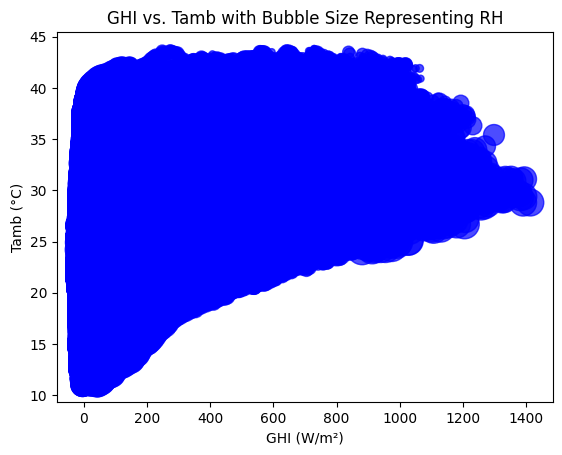

In [62]:
# Normalize the bubble size variable
normalized_rh = (beninData['RH'] - beninData['RH'].min()) / (beninData['RH'].max() - beninData['RH'].min())

plt.scatter(beninData['GHI'], beninData['Tamb'], s=normalized_rh * 500, alpha=0.7, c='blue')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Tamb (°C)')
plt.title('GHI vs. Tamb with Bubble Size Representing RH')
plt.show()

Data Cleaning

I cleaned the data above and no cleaning is needed here